# 3D Reconstruction
# Structure from Motion (affine only), Tomasi and Kanade Factorization Method

Presented by: Liyan Tan, Yequan Zhao

24'Spring UCSB ECE 278A Digital Image Processing

Work distribution:
- Slides for SfM theory & Tomasi and Kanade Factorization Method: Liyan Tan, Yequan Zhao
- Code Implementation of Tomasi and Kanade Factorization Method: Liyan Tan
- Recent Paper Presentation: Yequan Zhao

# Motivations:

### Understanding the 3D World from 2D Images

- Understand the complex three-dimensional world through multiple two-dimensional images.

### Structure from Motion

- Estimate the three-dimensional structure of a scene by analyzing the motion of the camera and the changes across multiple images.

- Mapping and Navigation: creating maps and navigating through environments.
- Film and Entertainment: creating and manipulating digital environments.
- Medical Imaging: helps in reconstructing 3D models of organs from 2D image slices.

# Examples of 3D reconstruction:

### Archaeology and Cultural Heritage: reconstructing artifacts and sites from fragmentary remains or pictures of different angles
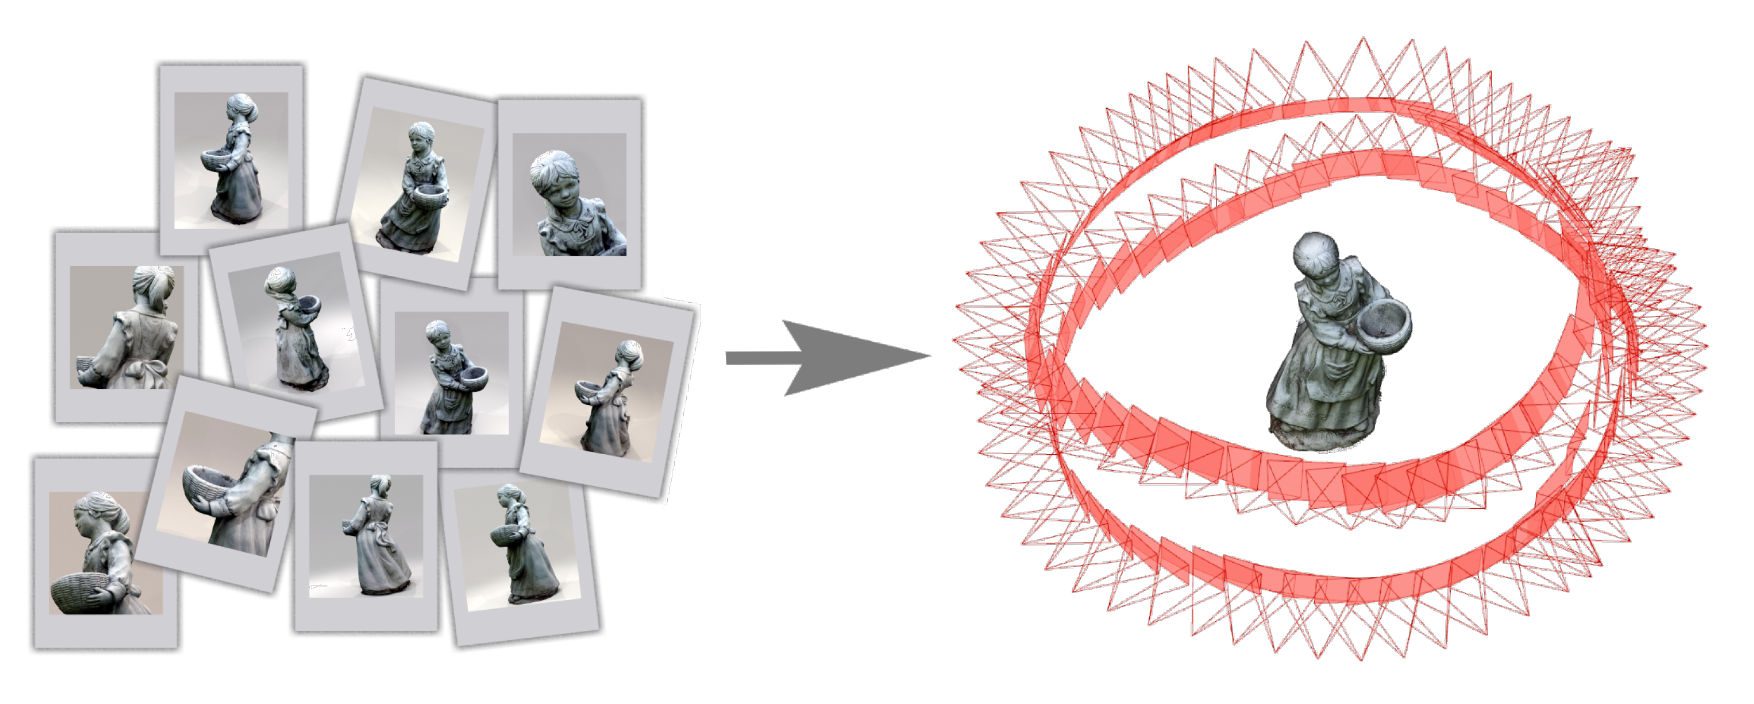

# Recall: Image Formation Model

Triangulation is a method used to determine the three-dimensional position of a point $P$ by measuring its projections $p$, $p'$ from two distinct camera views $O_1$ and $O_2$.

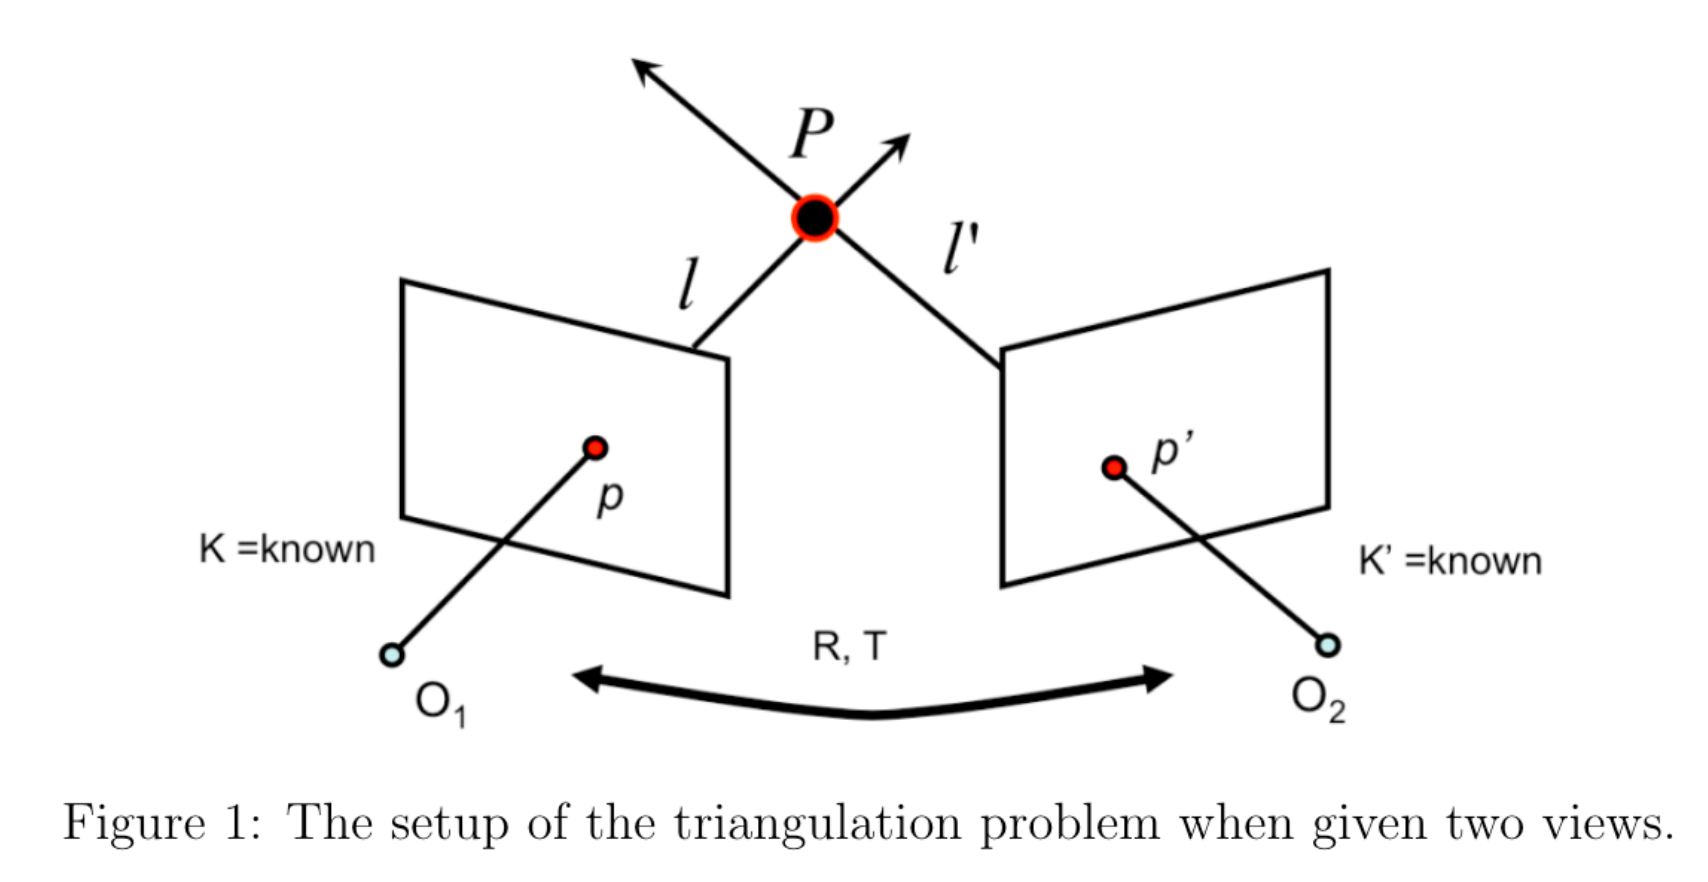

# Projection in Image Formation Model

The projection of a real world point $P$ to the digital image plane is:
$$p 
= 
K  \begin{bmatrix}
I_3 & 0
\end{bmatrix}
\begin{bmatrix}
R & T \\
0 & 1
\end{bmatrix} P
= M P
$$

where:
- $M$ is the  projection matrix, composed of:
  - $K$ the intrinsic camera matrix, contains the camera's internal characteristic: focal lengths and optical center
  - $R$ the extrinsic rotation, represents the orientation of the camera in space relative to some world coordinate system.
  - $t$ the extrinsic translation, used to rotate coordinates from the world frame to the camera frame.
  

# Towards Estimating Scene and Camera Parameters

Before:
- we assumed that camera parameters were known
- we estimated 3D point from the scene $P$

Now:
- we estimate both together



# Example

For example, from the 2D points like below...

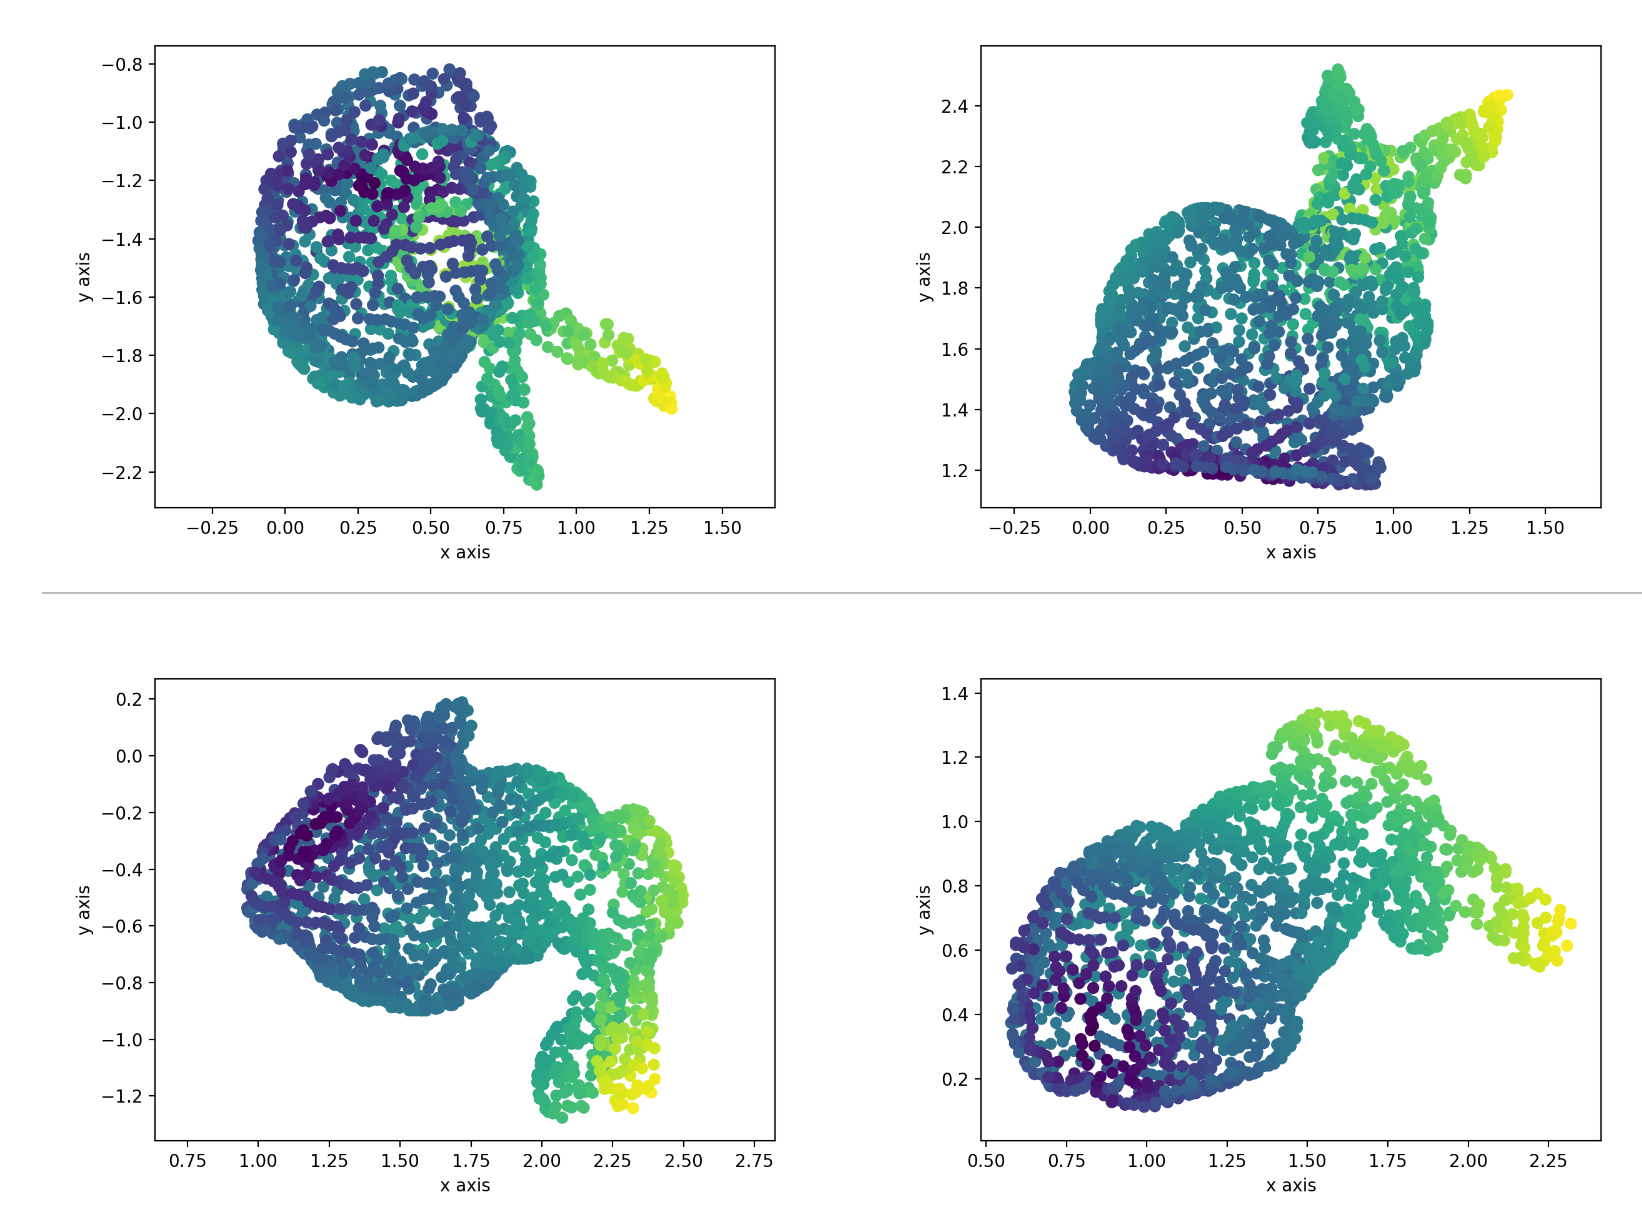


# Example:

We want to reconstruct the 3D object.

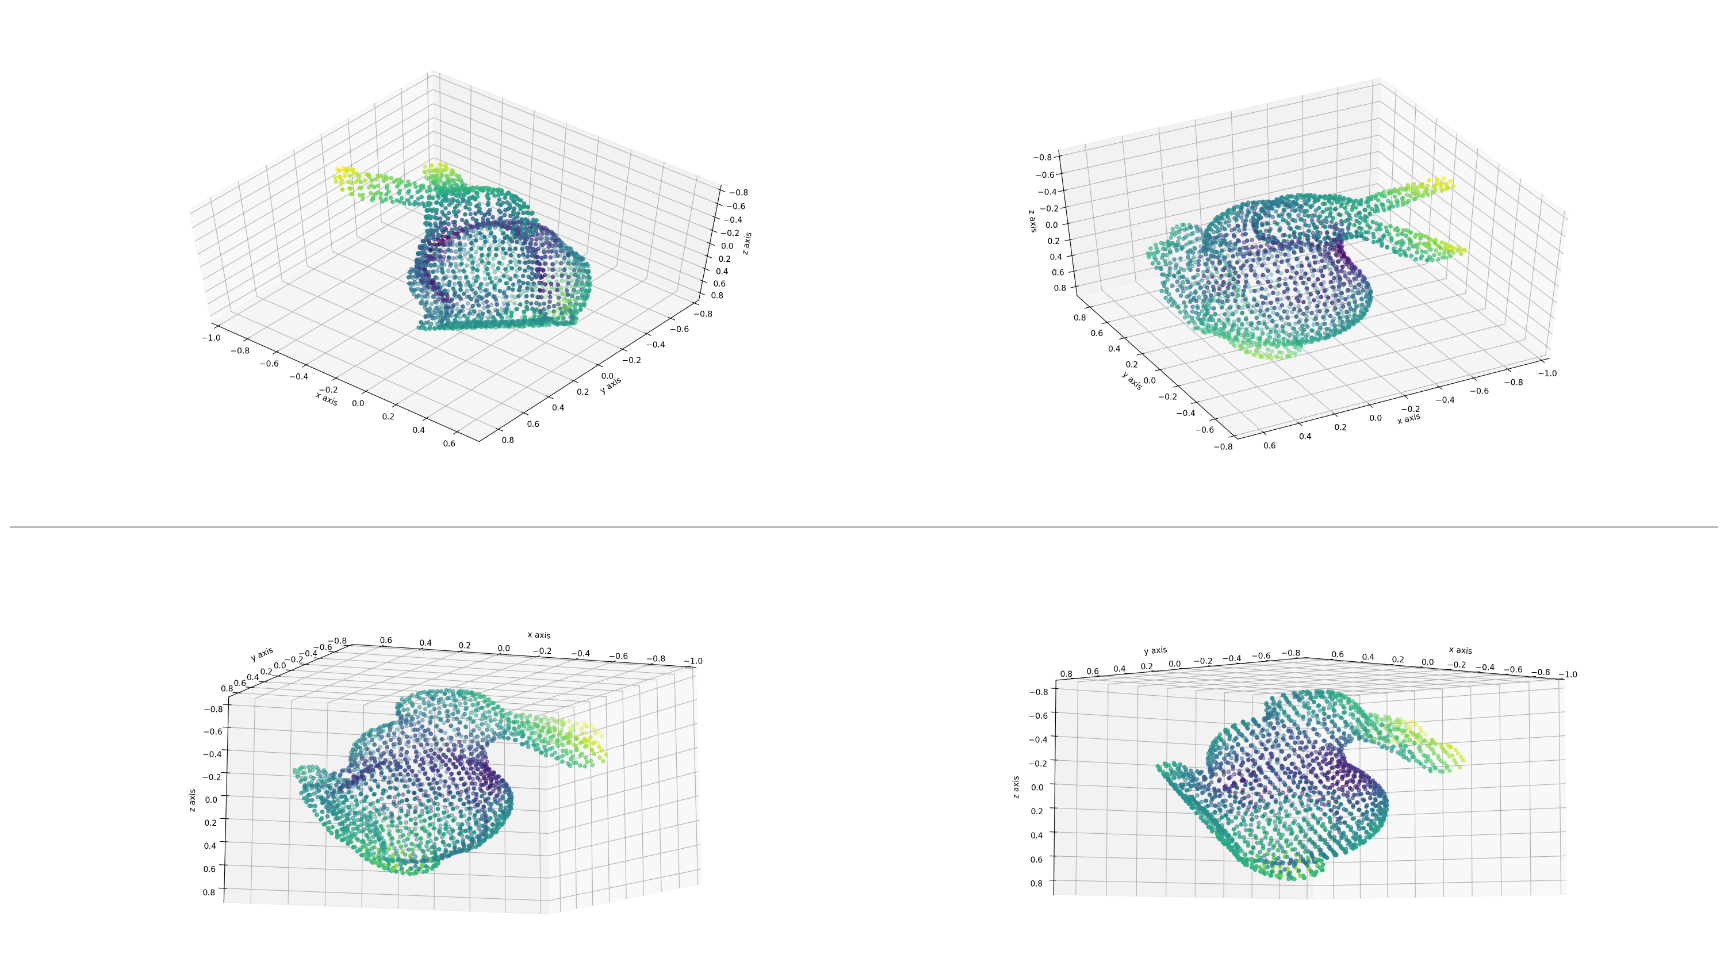

# Structure from Motion

$\color{#EF5645}{\text{Structure from Motion}}$ is a class of methods that simultaneously determine both the 3D structure of the scene and the parameters of the cameras.

$\color{#EF5645}{\text{Remark}}$: It is called "motion", because this can also be from one camera moving around an object.



# Structure from Motion: Notations

$\color{#EF5645}{\text{Notations}}$: We have:
- $m$ cameras with projection matrices $M_i$, $i=1, ..., m$
- $n$ points on a 3D scene: $X_j$, $j=1, ..., n$

We are given:
- $x_{ij}$ the point representing $X_j$ in camera $i$: $x_{ij} = M_i X_j$.

We want to recover:
- structure of the scene, i.e. the $X_j$
- camera parameters $M_i$ (often a moving camera).


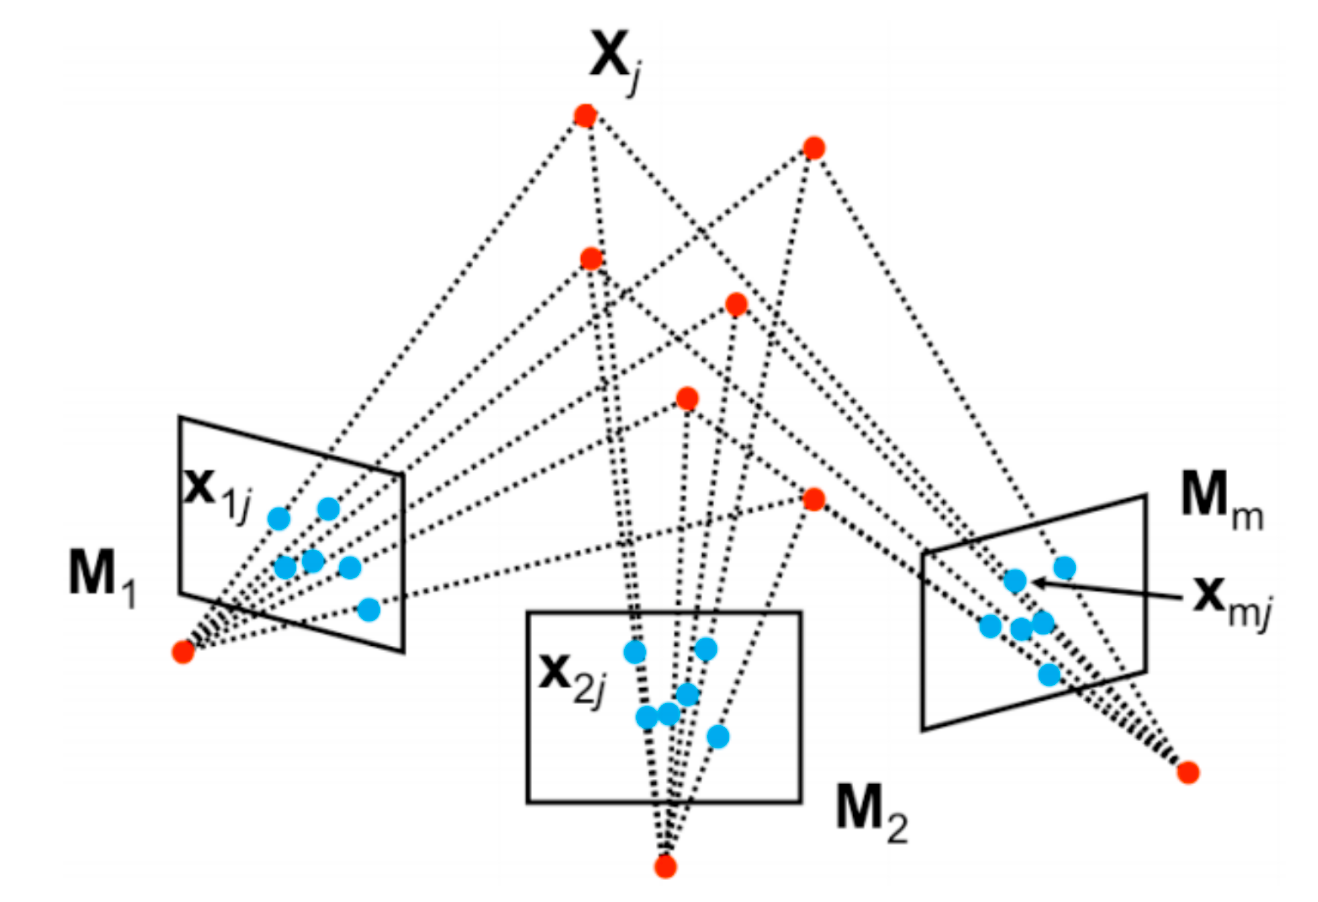

# Assumptions for SfM

Depending on the class of the projection matrices, we get different SfM:
- $\color{#EF5645}{\text{Affine SfM}}$: If $M$ corresponds to an affine transformation:
 - $M = \begin{bmatrix}
A & b \\
0 & 1
\end{bmatrix}$ which we also write $M = \begin{bmatrix}
A & b 
\end{bmatrix}$ so that $x = MX = AX +b$.
- $\color{#EF5645}{\text{Projective SfM}}$: If $M$ is projective:
  - $M = \begin{bmatrix}
A & b \\
v & 1
\end{bmatrix}$

# Characteristics for SfM

### Camera Model
- Affine SfM uses an affine camera model, which is a simplification of the projective camera model.
- The affine camera model ignores the effects of depth when mapping 3D points to 2D images.
- This model assumes parallel projection: the lines that are parallel in the 3D world remain parallel in the image plane.

### Mathematical Simplification
- Affine transformations preserve points, straight lines, and planes.
- The equations governing the image formation process are linear.

# Affine SfM: Set-up


$\color{#EF5645}{\text{Given:}}$ Image points $x_{ij}$ representing $X_j$ in camera $i$ with projection matrix $M_i$: 

$$x_{ij} = M_i X_j = A_i X_j + b_i$$

$\color{#EF5645}{\text{Goal:}}$ Recover:
- structure of the scene, i.e. the $X_j$
- camera parameters $M_i$ 

# Affine SfM: Unknowns and Equations

$\color{#EF5645}{\text{Given:}}$
- $x_{ij}$: $2mn$ elements, which will give $2mn$ equations
- $m$ is the number of cameras: each camera captures an image from a different viewpoint.
- $n$ is the number of points: distinct feature points in the scene that are being tracked across different images.
- Projection in Each Image: In each image taken by each camera, every point $X_j$ projects to a 2D point $(x,y)$ on the image plane.

# Affine SfM: Unknowns and Equations



$\color{#EF5645}{\text{Goal:}}$ Recover:
- structure of the scene, i.e. the $X_j$: $3n$ unknowns: each point has three coordinates: $x$, $y$, $z$
- camera parameters, i.e. $M_i= (A_i, b_i)$: $8m$ unknowns $A_i$ is a $2\times3$ matrix, $b_i$ is a translation vector with 2 components.

$\rightarrow$ there is a minimum number of $2D$ images that we need to solve this problem.

# Affine SfM: Unknowns and Equations

The SfM problem can be solved if we have at least enough equations for the number of unknowns, i.e.
$$2 mn \geq 8m + 3n.$$

$\color{#047C91}{\text{Example}}$:
- Given that we have two cameras, i.e. $m = 2$, how many 3D points do we need? 
- $n \geq 16$, at least 16 3D points.
- Given that we have 5 $3D$ points i.e. $n=2$, how many cameras do we need?
- $m \geq 7.5$, at least 8 cameras.

# Tomasi and Kanade Factorization Method

$\color{#EF5645}{\text{The Tomasi and Kanade Factorization Method}}$ is a method for solving the affine SfM. 

It consists of two steps:
- **Data centering step**
- Factorization step

# Data Centering Step

Our original equations are: $x_{ij} = \begin{bmatrix} A_i  & b_i \end{bmatrix} X_j$, where:
- we do not know $A_i, b_i$ and $X_j$

$\color{#EF5645}{\text{The data centering step}}$ helps focusing the problem on first estimating:
- the matrices $A_i$, 
- independently of the translations $b_i$,

... by transforming these original equations.

# Data Centering Step

In practice, this step centers the set of 2D image points.

For each image $i$, 
  - each point $j$ is centered by substracting the mean $\bar x_i$ of the point set:

$$\hat x_{ij} = x_{ij} - \bar x_i = x_{ij} - \frac{1}{n}\sum_{k=1}^n x_{ik}.$$

So that we transform our datasets of $x_{ij}$ into a dataset of $\hat x_{ij}$.

# Data Centering Step

This gives:

$$\begin{align*}
\hat x_{ij} 
&= x_{ij} - \frac{1}{n}\sum_{k=1}^n x_{ik} \\
&= A_i X_j + b_i - \frac{1}{n}\sum_{k=1}^n (A_iX_k + b_i)\\
&= A_i X_j - \frac{1}{n}\sum_{k=1}^n A_iX_k\\
&= A_i (X_j - \frac{1}{n}\sum_{k=1}^n X_k)\\
&=A_i(X_j - \bar X)\\
&=A_i\hat X_j
\end{align*}
$$



# Data Centering Step

Thus, our new equations are: $\hat x_{ij} = A_i \hat X_j$, where:
- we do not know $A_i$ and $\hat X_j$.

$ \rightarrow$ we eliminated the estimation of the translations $b_i$.

# Measurement Matrix

Goal: Factor out $A_i$ and $\hat X_j$, for all $i$ and $j$.

$\rightarrow$ Gather everything in a big matrix.

$\color{#EF5645}{\text{The measurement matrix}}$ $D$ is defined as:
$$D = \begin{bmatrix}
\hat x_{11} & \hat x_{12} & ... & \hat x_{1n}\\
\hat x_{21} & \hat x_{22} & ... & \hat x_{2n}\\
... & \hat ... & ... & ...\\
\hat x_{m1} & \hat x_{m2} & ... & \hat x_{mn}\\
\end{bmatrix}
$$
where each $\hat x_{ij}$ is a $2 \times 1$ vector.

This $D$ is of shape $2m \times n$.



# Measurement Matrix

Thanks to the data centering step, the measurement matrix $D$ can be reformulated as:
$$D = \begin{bmatrix}
A_1 \hat X_1 & A_1 \hat X_2 & ... & A_1 \hat X_n\\
A_2 \hat X_1 & A_2 \hat X_2 & ... & A_2 \hat X_n\\
... &  ... & ... & ...\\
A_m \hat X_1 & A_m \hat X_2 & ... & A_m \hat X_n\\
\end{bmatrix}
$$

which we write:
$$D = MS$$

# Motion Matrix

In the equation $D = MS$ we have:
- $M$ is called the $\color{#EF5645}{\text{motion matrix}}$ and contains all the matrices $A_i$
- $S$ is called the structure matrix and contains all the matrices $\hat X_j$

Specifically, $M$ is the $2m \times 3$ matrix:
$$M = \begin{bmatrix}
A_1 \\
... \\
A_m 
\end{bmatrix}
$$
since each matrix $A_i$ is $2 \times 3$.

# Structure Matrix

In the equation $D = MS$ we have:
- $M$ is called the motion matrix and contains all the matrices $A_i$ of the scene points as columns. 
- $S$ is called the $\color{#EF5645}{\text{structure matrix}}$ and contains all the matrices $\hat X_j$. So, if we have $n$ points in the scene, $S$ is a $3\times n$ matrix.

Specifically, $S$ is the $3 \times n$ matrix:
$$S = \begin{bmatrix}
\hat X_1 & ... & \hat X_n 
\end{bmatrix}
$$
since each matrix $X_j$ is a 3D vector.

# Towards a Factorization Problem

Thus, our equation writes:
$D = MS = \begin{bmatrix}
A_1 \\
... \\
A_m 
\end{bmatrix}
\begin{bmatrix}
\hat X_1 & ... & \hat X_n 
\end{bmatrix}
$ where:
- we do not know $M$ and $S$


# Towards a Factorization Problem

$\color{#6D7D33}{\text{Property}}$: Written as the above product, we know that:
- $rank(D) = 3$, since $D$ is the product of two matrices of maximum dimension $3$.
- Why is that? The rank of a matrix product is at most the minimum of the ranks of the factors. Therefore, $\mathrm{rank}(D)\leq\min(\mathrm{rank}(M),\mathrm{rank}(S))$.
- Rank of $M$ matrix that depends on the parameters of the affine cameras, under normal circumstances where the camera configurations are not degenerate (no exact linear dependencies among rows), so $rank(M)=3$.
- Rank of $S$. Assuming the 3D points are not all collinear or coplanar and are properly distributed in three dimensions, so $rank(S)=3$.

# Tomasi and Kanade Factorization Method

$\color{#EF5645}{\text{The Tomasi and Kanade Factorization Method}}$ is a method for solving the affine SfM. 

It consists of two steps:
- Data centering step
- **Factorization step**

# Factorization via SVD

We will factorize matrix $D$ using singular value decomposition:
$$D = U \Sigma V^T,$$
and will recover $M$ and $S$ from combinations of $U, \Sigma, V$.


# Factorization via SVD

Brief introduction of SVD:
- SVD decomposes any given matrix into three other matrices $U, \Sigma, V$.
- U is an $m \times m$ orthogonal matrix whose columns are the left singular vectors of $D$.
- $\Sigma$ (Sigma) is an diagonal matrix with non-negative real numbers on the diagonal known as singular values.
- $V_T$ is the transpose of an $n \times n$ orthogonal matrix whose columns are the right singular vectors of $D$.


Since $rank(D) = 3$:
- only be 3 nonzero singular values $\sigma_1, \sigma_2, \sigma_3$ in $\Sigma$.



# Factorization via SVD

$$\begin{align*}
D 
&= U \Sigma V^T \\
&=
\begin{bmatrix}
u_1 & ... & u_n
\end{bmatrix}
\begin{bmatrix}
\sigma_1 & 0 & 0 &... & 0 \\
0 & \sigma_2 & 0 &... & 0 \\
0 & 0 & \sigma_3 & ... & 0 \\
0 & 0 & 0 & ... & 0 \\
... & ... & ... & ... & 0 \\
0 & 0 & 0 & ... & 0 \\
\end{bmatrix}
\begin{bmatrix}
v_1^T \\
... \\
v_n^T
\end{bmatrix}\\
&=
\begin{bmatrix}
u_1 & u_2 & u_3
\end{bmatrix}
\begin{bmatrix}
\sigma_1 & 0 & 0 \\
0 & \sigma_2 & 0 \\
0 & 0 & \sigma_3 
\end{bmatrix}
\begin{bmatrix}
v_1^T \\
v_2^T \\
v_3^T
\end{bmatrix}\\
&= U_3 \Sigma_3 V_3^T 
\end{align*}
$$

# Factorization via SVD

In the SVD: $D = U_3 \Sigma_3 V_3^T$:
- $\Sigma_3$ is diagonal matrix formed with non zero singular values
- $U_3, V_3^T$ are obtained by taking the corresponding three columns of $U$ and rows of $V^T$ respectively.

# In Practice

$\color{#EF5645}{\text{Remark:}}$ Unfortunately, in practice, rank(D) > 3 because of measurement noise and the affine camera approximation. 

However, when rank(D) > 3, $U_3 \Sigma_3 V_3^T$ is still the best possible rank-3 approximation of $M S$ in the sense of the Frobenius norm. 


# From SVD to M and S

In the SVD: $D = U_3 \Sigma_3 V_3^T$, we note that:
- $\Sigma_3 V_3^T$ forms a $3 \times n$ matrix: same size as the structure matrix S
- $U_3$ is a $2m \times 3$ matrix: same size as the motion matrix M .

$\rightarrow$ Assign $S = \Sigma_3 V_3^T$ and $M = U_3$?



# From SVD to M and S

But what about:
- $V_3^T$ is a $3 \times n$ matrix: same size as the structure matrix S
- $U_3 \Sigma_3$ is a $2m \times 3$ matrix: same size as the motion matrix M .

$\rightarrow$ Assign $S = V_3^T$ and $M = U_3 \Sigma_3 $?



# From SVD to M and S

Answer in Tomasi and Kanada's paper:
- Choose $S = \sqrt{\Sigma_3} V_3^T$ and $M = U_3 \sqrt{\Sigma_3}$ where:
    - $\sqrt{N}$ is the matricial square root.

# Remark: Ambiguity in Reconstruction

We say that there is an ambiguity in the choice of factorization, because any $3 \times 3$ invertible matrix $A$ may be inserted into the decomposition: 
$$D = M AA^{−1}S = (M A)(A^{−1}S)$$
This means that:
- $M$ is undetermined, i.e. the camera matrices $A_j$ are undetermined
- $S$ is undetermined, i.e. the 3D points $X_i$ are undetermined.

$\rightarrow$ Need extra constraints to solve ambiguity.

When a reconstruction has affine ambiguity, it means that parallelism is preserved, but the metric scale is unknown.

The fact that there is no way to recover the absolute scale of a scene from images is fairly intuitive. An object’s scale, absolute position and canonical orientation will always be unknown unless we make further assumptions (e.g, we know the height of the house in the figure) or incorporate more data. This is because some attributes may compensate for others. For instance, to get the same image, we can simply move the object backwards and scale it accordingly.

